# SquatCounter

**The goal of this project is to count the number of people present in a specific room.**

## Library and utils

In [1]:
import PIL
import numpy as np
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
import glob
import csv

from sklearn.preprocessing import StandardScaler

## Loading data


In [16]:
PATH = "./timelapse/"

with open('labels.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('coors_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        mydict = {rows[0]:rows[1] for rows in reader}

image_list = []
y_list = []
for filename in glob.glob(f"{PATH}*.jpeg"):
    im=Image.open(filename)
    y_list.append(mydict.get(filename.replace(PATH,""),-1))
    image_list.append(asarray(im))
    
X = np.stack(image_list, axis = 0).astype("uint8")
y = np.array(y_list).astype(int)

labelised = (y!=-1)

print(f"Not labelized : {(~labelised).sum()}")

X = X[labelised]
y = y[labelised]

print(X.shape)
print(y.shape)

h,w = X.shape[1], X.shape[2]
n = X.shape[0]

Not labelized : 2
(429, 240, 320, 3)
(429,)


Class repartition in the train dataset :


Text(0.5, 0, 'train labels')

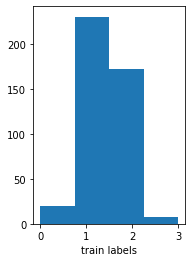

In [21]:
plt.subplot(1, 2, 1)
print("Class repartition in the train dataset :")
plt.hist(y, bins=y.max() + 1)
plt.xlabel('train labels')

## Data preprocessing

In [123]:
scaler = StandardScaler(with_std=False)
scaler.fit(X.reshape(431,230400))

StandardScaler(with_std=False)

In [124]:
mean = scaler.mean_.reshape(240,320,3)
print(mean.shape)

(240, 320, 3)


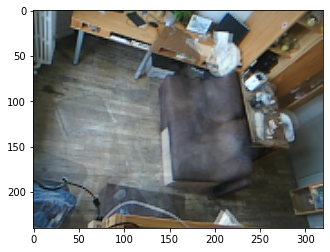

In [125]:
plt.imshow(mean.astype("uint8"))

In [126]:
X_rescaled = scaler.transform(X.reshape(431,230400)).reshape(431,240,320,3)

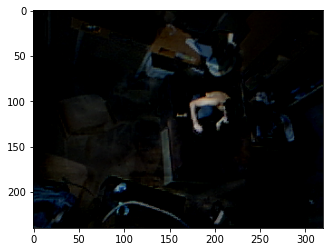

In [132]:
image_test = X_rescaled[286]
image_test[image_test < 0] = 0
plt.imshow(image_test.astype("uint8"))

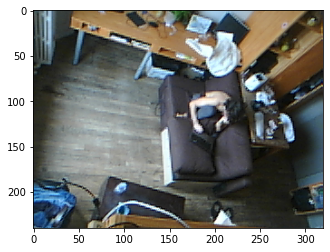

In [134]:
plt.imshow(X[286])